In [ ]:
import pandas as pd
import numpy as np

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score, plot_confusion_matrix
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier


# Additional library
import os
import re
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
!pip install google-trans-new
!pip install googletrans==3.1.0a0

     |████████████████████████████████| 55 kB 2.9 MB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 16.6 MB/s 
     |████████████████████████████████| 65 kB 4.1 MB/s 
     |████████████████████████████████| 53 kB 2.2 MB/s 
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=39dd7798f06a23dbca7f0e18e1396d74898ed9c49fe17380329de66c37460c9a
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_sep = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/oktober_1000.xlsx')
df_okt = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/oktober_2000.xlsx')
df_okt_akh = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/oktober_akhir_1000.xlsx')

In [ ]:
# cek value count
df_sep['tanggal_tweet'].value_counts()

# for col in df_sep:
#   print(df_sep[col].unique)

2021-10-03 23:55:08    2
2021-10-03 23:32:52    2
2021-10-04 23:51:45    2
2021-09-30 23:53:24    2
2021-10-05 23:41:43    2
                      ..
2021-10-04 23:42:29    1
2021-10-03 23:31:03    1
2021-10-02 23:45:03    1
2021-10-03 23:52:29    1
2021-10-04 23:35:00    1
Name: tanggal_tweet, Length: 763, dtype: int64

In [ ]:
#merge dataset
frames = [df_sep, df_okt, df_okt_akh]
df = pd.concat(frames)

#replace column's name
df = df.rename(columns={"tanggal_tweet": "date", "pengguna": "username", "tweet":"tweet"})
df = df[['date','username','tweet']]

In [ ]:
df.head() #2500 rows × 3 columns

,date,username,tweet
0,2021-10-07 23:59:59,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...
1,2021-10-07 23:59:56,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...
2,2021-10-07 23:59:21,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...
3,2021-10-07 23:58:22,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...
4,2021-10-07 23:58:14,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...


## CLEANSING DATA

In [ ]:
import string
string.punctuation

# #function
# def remove_punctuation(txt):
#   txt_nopunct = [c for c in txt if c not in string.punctuation]
#   return txt_punct 

# #apply function
# df['clean_tweet'] = df['tweet'].apply(lambda x: remove_punctuation())
# df

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

> **data cleansing process including Removing Punctuation inside**

In [ ]:
# Mengubah kata ke lowercase
# def caseFolding(text):
#     text = text.lower()
#     return text

# Menghilangkan karakter khusus dan angka / REMOVING PUNCTUATION
def cleansing(text):
    text = ' '.join(re.sub("[@#][A-Za-z0-9_]+|([^0-9A-Za-z \t])|(\w+:\/\/\S+)+|^https?:\/\/.*[\r\n]*"," ", text).split(' '))
    text = re.sub(r"\d+", "", text)
    text = ' '.join(text.split())
    return text

# Menghilangkan duplicate
# def remove_duplikat_tweet(tweet_array):
#     text_list_tweet = list()
#     list_tweet     = list()
#     for x in tweet_array:
#         if x['clean_tweet'] not in text_list_tweet:
#             text_list_tweet.append(x['clean_tweet'])
#             list_tweet.append(x)
#     return list_tweet

In [ ]:
list_tweet = list()
for index, row in df.iterrows():
    _tweet = row['tweet']
    # _tweet = caseFolding(_tweet)
    _tweet = cleansing(_tweet)
    
    tmp_list = {
        #'id'          : row['id'], 
        'username'    : row['username'],
        'tweet'       : row['tweet'],
        'clean_tweet' : _tweet
    }
    list_tweet.append(tmp_list)

df_list_tweet = pd.DataFrame(list_tweet)
df_list_tweet['clean_tweet']=df_list_tweet['clean_tweet'].replace(regex={'RT': ''})

In [ ]:
df_list_tweet
# print(list_tweet)

,username,tweet,clean_tweet
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...
...,...,...,...
2495,sssatpolll,Vaksinasi Bukan Hanya Semata Menyelamatkan Dir...,Vaksinasi Bukan Hanya Semata Menyelamatkan Dir...
2496,KangOys,RT @gibran_tweet: ‘Santri Siaga Jiwa Raga’ tur...,Santri Siaga Jiwa Raga turut jadi pedoman di ...
2497,AmierHamzah75,RT @InsafKini: Tahniah &amp; Syabas Kementeria...,Tahniah amp Syabas Kementerian Kesihatan Mala...
2498,parwatyRizky,"RT @ariestarico2: Dilansir dari Nikkei Asia, t...",Dilansir dari Nikkei Asia total skor dalam in...


In [ ]:
# Menghilangkan tweet yang sama dari data hasil cleansing
new_list_tweet = df_list_tweet.drop_duplicates(subset=['clean_tweet'])
print('Total tweet sebelum sebelum duplicate :', len(df_list_tweet))
print('Total tweet sesudah sesudah remove duplicate :', len(new_list_tweet))

df_new_list_tweet = pd.DataFrame(new_list_tweet)
df_new_list_tweet

Total tweet sebelum sebelum duplicate : 2500
Total tweet sesudah sesudah remove duplicate : 1415


,username,tweet,clean_tweet
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...
...,...,...,...
2491,KontanNews,"Vaksinasi Covid-19 per 23 Oktober bertambah 1,...",Vaksinasi Covid per Oktober bertambah juta dosis
2492,SuaraBojonegoro,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...
2494,sssatpolll,"Keberhasilan PPKM, Vaksinasi Dan Disiplin Prok...",Keberhasilan PPKM Vaksinasi Dan Disiplin Proke...
2496,KangOys,RT @gibran_tweet: ‘Santri Siaga Jiwa Raga’ tur...,Santri Siaga Jiwa Raga turut jadi pedoman di ...


In [ ]:
#export df_new_list_tweet to google drive
# df_new_list_tweet.to_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/df_new_list_tweet_2.1.xlsx')

## Translate tweet ke bahasa inggris

> **install googletrans library**
- https://youtu.be/8zfS23WSIuI
- https://py-googletrans.readthedocs.io/en/latest/ [*googletrans*] 

In [ ]:
!pip install googletrans
!pip install google-trans-new
!pip install google_trans_new

     |████████████████████████████████| 55 kB 857 kB/s 
     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 1.3 MB 42.7 MB/s 
     |████████████████████████████████| 53 kB 2.0 MB/s 
     |████████████████████████████████| 65 kB 3.4 MB/s 
  Created wheel for googletrans: filename=googletrans-3.0.0-py3-none-any.whl size=15735 sha256=76420c39fd95656e2b55b44a5a3e3fc2b52dda619b9d997482ea4e0012b2237f
  Stored in directory: /root/.cache/pip/wheels/20/da/eb/a54579056f265eede0417df537dd56d3df5b9eb2b25df0003d
Successfully built googletrans


In [ ]:
!pip install googletrans==3.1.0a0

  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16367 sha256=7b991580abe98c326aa22662931af472d20ea72212e1eb54dcd085a717a2a94f
  Stored in directory: /root/.cache/pip/wheels/0c/be/fe/93a6a40ffe386e16089e44dad9018ebab9dc4cb9eb7eab65ae
Successfully built googletrans
  Attempting uninstall: googletrans
    Found existing installation: googletrans 3.0.0
    Uninstalling googletrans-3.0.0:
      Successfully uninstalled googletrans-3.0.0


In [ ]:
# Contoh eng to ind
from googletrans import Translator
translator = Translator()
translator.translate('This sentence is written in English', dest='id').text

'Kalimat ini ditulis dalam bahasa Inggris'

In [ ]:
# Contoh ind to eng
from googletrans import Translator
translator = Translator()
translator.translate('Kalimat ini ditulis dalam bahasa Inggris', dest='en').text

'This sentence is written in English'

In [ ]:
translated_data = df_new_list_tweet
translated_data.head() 

,username,tweet,clean_tweet
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...


In [ ]:
#translate tweets to English
from googletrans import Translator
translator = Translator()

translations = []

for i in translated_data.index:
  translated = translator.translate(translated_data.clean_tweet[i], dest='en').text
  translations.append(translated)

In [ ]:
# tampung hasil translate ke variable/dataframe translations
translations = pd.DataFrame(translations)

# gabungkan hasli translate kedalam data translated_data
translated_data['en_tweet'] = translations

In [ ]:
translated_data

,username,tweet,clean_tweet,en_tweet
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...
...,...,...,...,...
1410,KontanNews,"Vaksinasi Covid-19 per 23 Oktober bertambah 1,...",Vaksinasi Covid per Oktober bertambah juta dosis,Covid vaccination as of October increases mill...
1411,SuaraBojonegoro,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...,Education vaccination to residents by Bhabinka...
1412,sssatpolll,"Keberhasilan PPKM, Vaksinasi Dan Disiplin Prok...",Keberhasilan PPKM Vaksinasi Dan Disiplin Proke...,The success of PPKM Vaccination and Discipline...
1413,KangOys,RT @gibran_tweet: ‘Santri Siaga Jiwa Raga’ tur...,Santri Siaga Jiwa Raga turut jadi pedoman di ...,Santri Alert Soul Soul also became a guidelin...


In [ ]:
#export df_new_list_tweet to google drive
# translated_data.to_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/translated_data_tweets_2.1.xlsx', index=False)

## Data Pre-processing

In [ ]:
# !pip install Sastrawi
# from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory #import Indonesian Stemmer

# from nltk.stem import LancasterStemmer

#from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Import Library
import pandas as pd
import numpy as np

In [ ]:
!pip install nltk

In [ ]:
# word_tokenize library for tokenization process using nltk
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize 
nltk.download('punkt')

# library for process of pos-tagging, lemmatization and cleaning the stopwords   
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
from sklearn.feature_extraction.text import TfidfVectorizer # pembobotan kemudian u/ menghitung polarity
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

# additional library
# from scipy.spatial import distance
# from sklearn.metrics.pairwise import cosine_similarity

# nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
sample_reviews = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/translated_data_tweets_2.1.xlsx')

In [ ]:
df_corpus = sample_reviews 
df_corpus.head()

,username,tweet,clean_tweet,en_tweet
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...


> **CASE FOLDING**

In [ ]:
#konversi tweet ke LOWER CASE / CASE FOLDING
df_corpus['text'] = df_corpus['en_tweet'].str.lower()

In [ ]:
# cek data null
# word_tokenize tidak akan jalan kalau data masih ada yang null
# data tweet null karena ada user yang tidak mention apapun

df_corpus.isnull().sum()

username       0
tweet          0
clean_tweet    1
en_tweet       1
text           1
dtype: int64

In [ ]:
df_corpus.head(5)

,username,tweet,clean_tweet,en_tweet,text
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...


> **TOKENIZATION**

In [ ]:
#drop data null
corpus = df_corpus.dropna()

#konversi tweet ke proses TOKENIZATION menggunakan word_tokenize
corpus['text_tokenized'] = corpus.apply(lambda row: nltk.word_tokenize(row['text']), axis=1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
corpus.head() 

,username,tweet,clean_tweet,en_tweet,text,text_tokenized
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"[after, cross-state, allowed, no, roadblocks, ..."
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"[keep, covid, vaccination, at, tangkeliling, p..."
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"[control, the, movement, of, those, who, refus..."
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"[vaccination, to, save, yourself, and, the, va..."
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"[important, vaccination, is, done, to, increas..."


In [ ]:
corpus.isnull().sum()

username          0
tweet             0
clean_tweet       0
en_tweet          0
text              0
text_tokenized    0
dtype: int64

> **POS-TAGGING**

In [ ]:
# import nltk

# def tokenization(text):
#   sentence = nltk.sent_tokenize(text)
#   for sent in sentence:
#     pos_tagging = nltk.pos_tag(nltk.word_tokenize(sent))
#     print(pos_tagging)
 
# looping = corpus['text']
# for text in looping:
#   tokenization(text)

In [ ]:
#create function for pos-tagging
import nltk

def tokenization(text):
  sentence = nltk.sent_tokenize(text)
  for sent in sentence:
    pos_tagging = nltk.pos_tag(nltk.word_tokenize(sent))
  return pos_tagging

array_baru = []
looping = corpus['text']
for text in looping:
  array_baru.append(tokenization(text))
# print(array_baru)

#apply function for pos-tagging
corpus['text_tagging']  = array_baru 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"[after, cross-state, allowed, no, roadblocks, ...","[(after, IN), (cross-state, NN), (allowed, VBD..."
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"[keep, covid, vaccination, at, tangkeliling, p...","[(keep, VB), (covid, NN), (vaccination, NN), (..."
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"[control, the, movement, of, those, who, refus...","[(control, VB), (the, DT), (movement, NN), (of..."
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"[vaccination, to, save, yourself, and, the, va...","[(vaccination, NN), (to, TO), (save, VB), (you..."
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"[important, vaccination, is, done, to, increas...","[(important, JJ), (vaccination, NN), (is, VBZ)..."


> **STOPWORD**

In [ ]:
import nltk
stopwords = nltk.corpus.stopwords.words('english')
stopwords[0:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [ ]:
#create function removing stopword
def remove_stopwords(txt_tokenized):
  txt_clean = [word for word in txt_tokenized if word not in stopwords]
  return txt_clean

#apply function for removing stopword
corpus['text_stopword'] = corpus['text_tokenized'].apply(lambda x: remove_stopwords(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"[after, cross-state, allowed, no, roadblocks, ...","[(after, IN), (cross-state, NN), (allowed, VBD...","[cross-state, allowed, roadblocks, check, pers..."
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"[keep, covid, vaccination, at, tangkeliling, p...","[(keep, VB), (covid, NN), (vaccination, NN), (...","[keep, covid, vaccination, tangkeliling, puske..."
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"[control, the, movement, of, those, who, refus...","[(control, VB), (the, DT), (movement, NN), (of...","[control, movement, refuse, receive, vaccinati..."
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"[vaccination, to, save, yourself, and, the, va...","[(vaccination, NN), (to, TO), (save, VB), (you...","[vaccination, save, vaccine, family, proved, s..."
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"[important, vaccination, is, done, to, increas...","[(important, JJ), (vaccination, NN), (is, VBZ)...","[important, vaccination, done, increase, body,..."


> **STEMMING**
- Post Stemmer

In [ ]:
import nltk 
from nltk.stem import PorterStemmer
ps = PorterStemmer()
dir(ps) # use stem function bellow

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__unicode__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'unicode_repr',
 'vowels']

In [ ]:
#exaxmple steaming function
print(ps.stem('coder'))
print(ps.stem('codeing'))
print(ps.stem('code'))

coder
code
code


In [ ]:
#create function for stemming
def stemming(tokenized_text):
  text = [ps.stem(word) for word in tokenized_text]
  return text

#apply function for removing stopword
corpus['text_stemmed'] = corpus['text_stopword'].apply(lambda x: stemming(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
corpus.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"[after, cross-state, allowed, no, roadblocks, ...","[(after, IN), (cross-state, NN), (allowed, VBD...","[cross-state, allowed, roadblocks, check, pers...","[cross-stat, allow, roadblock, check, person, ..."
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"[keep, covid, vaccination, at, tangkeliling, p...","[(keep, VB), (covid, NN), (vaccination, NN), (...","[keep, covid, vaccination, tangkeliling, puske...","[keep, covid, vaccin, tangkelil, puskesk, buil..."
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"[control, the, movement, of, those, who, refus...","[(control, VB), (the, DT), (movement, NN), (of...","[control, movement, refuse, receive, vaccinati...","[control, movement, refus, receiv, vaccin, inj..."
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"[vaccination, to, save, yourself, and, the, va...","[(vaccination, NN), (to, TO), (save, VB), (you...","[vaccination, save, vaccine, family, proved, s...","[vaccin, save, vaccin, famili, prove, safe]"
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"[important, vaccination, is, done, to, increas...","[(important, JJ), (vaccination, NN), (is, VBZ)...","[important, vaccination, done, increase, body,...","[import, vaccin, done, increas, bodi, 's, immu..."


> **LEMMATIZATION**
- WordNet Lemmatizer

In [ ]:
# import nltk
# wn = nltk.WordNetLemmatizer()
# ps = nltk.PorterStemmer()
# dir(wn)

# # use  'lemmatize',

In [ ]:
# #create function lemmatization
# def lemmatization(token_txt):
#   text = [wn.lemmatize(word) for word in token_txt]
#   return text

# #apply function to dataframe
# corpus['text_lemmatized'] = corpus['text_stemmed'].apply(lambda x : lemmatization(x))

In [ ]:
# corpus

In [ ]:
#Export
#corpus.to_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/corpus_without_lemmatization_2.1.xlsx',index=False)

## Labeling dengan TextBlob

In [ ]:
import pandas as pd 
import numpy as np
import csv
import re
from datetime import datetime

# menghitung sentimen kata-kata yang berbahasa inggris
from textblob import TextBlob 

In [ ]:
corpus_2 = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/corpus_without_lemmatization_2.1.xlsx')
corpus_2.head() 

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ..."
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk..."
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va..."
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'..."
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'..."


In [ ]:
#determine the polarity value from dataset
sample_reviews = corpus_2

def detect_polarity(text_stemmed):
    return TextBlob(text_stemmed).sentiment.polarity

sample_reviews['polarity'] = sample_reviews.text_stemmed.apply(detect_polarity)
sample_reviews.head() 

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0


- Seperti yang bisa dilihat pada source code diatas, attribute **text_stemmed** yang akan dipilih untuk menentukan polarity. 
- Statement row dari attribute **text_stemmed** akan menerima nilai index untuk statment polarity secara otomatis.
- Nila polarity akan membantu dalam proses penentuan kelas label.

In [ ]:
#Membuat functionnya untuk memetakan label sentiment dari nilai polarity
def convert_label_category(row):
  if row['polarity'] > 0:
    return 'positif'
  elif row['polarity'] == 0:
    return 'netral'
  else:
    return 'negatif'

#Apply the function into dataframe
sample_reviews['label'] = sample_reviews.apply(convert_label_category,axis=1)

In [ ]:
sample_reviews

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral
...,...,...,...,...,...,...,...,...,...,...,...
1409,KontanNews,"Vaksinasi Covid-19 per 23 Oktober bertambah 1,...",Vaksinasi Covid per Oktober bertambah juta dosis,Covid vaccination as of October increases mill...,covid vaccination as of october increases mill...,"['covid', 'vaccination', 'as', 'of', 'october'...","[('covid', 'JJ'), ('vaccination', 'NN'), ('as'...","['covid', 'vaccination', 'october', 'increases...","['covid', 'vaccin', 'octob', 'increas', 'milli...",0.0,netral
1410,SuaraBojonegoro,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...,Edukasi Vaksinasi Kepada Warga Oleh Bhabinkamt...,Education vaccination to residents by Bhabinka...,education vaccination to residents by bhabinka...,"['education', 'vaccination', 'to', 'residents'...","[('education', 'NN'), ('vaccination', 'NN'), (...","['education', 'vaccination', 'residents', 'bha...","['educ', 'vaccin', 'resid', 'bhabinkamtibma', ...",0.0,netral
1411,sssatpolll,"Keberhasilan PPKM, Vaksinasi Dan Disiplin Prok...",Keberhasilan PPKM Vaksinasi Dan Disiplin Proke...,The success of PPKM Vaccination and Discipline...,the success of ppkm vaccination and discipline...,"['the', 'success', 'of', 'ppkm', 'vaccination'...","[('the', 'DT'), ('success', 'NN'), ('of', 'IN'...","['success', 'ppkm', 'vaccination', 'discipline...","['success', 'ppkm', 'vaccin', 'disciplin', 'pr...",0.3,positif
1412,KangOys,RT @gibran_tweet: ‘Santri Siaga Jiwa Raga’ tur...,Santri Siaga Jiwa Raga turut jadi pedoman di ...,Santri Alert Soul Soul also became a guidelin...,santri alert soul soul also became a guidelin...,"['santri', 'alert', 'soul', 'soul', 'also', 'b...","[('santri', 'NN'), ('alert', 'JJ'), ('soul', '...","['santri', 'alert', 'soul', 'soul', 'also', 'b...","['san

In [ ]:
#Hasil dari penentuan kelas label dengan TextBlob 
sample_reviews['label'].value_counts()

netral     943
positif    341
negatif    130
Name: label, dtype: int64

In [ ]:
sample_reviews[sample_reviews['label']=='negatif'].head(3)

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label
12,heni_dalimunthe,RT @SatbrimobL: Berdasarkan urat Edaran HK.02....,Berdasarkan urat Edaran HK I tentang Vaksinas...,Based on the Circular of HK I concerning Covi...,based on the circular of hk i concerning covi...,"['based', 'on', 'the', 'circular', 'of', 'hk',...","[('based', 'VBN'), ('on', 'IN'), ('the', 'DT')...","['based', 'circular', 'hk', 'concerning', 'cov...","['base', 'circular', 'hk', 'concern', 'covid',...",-0.80,negatif
17,asri786,RT @JPenerangan: Sila semak status risiko di M...,Sila semak status risiko di MySejahtera sebel...,Please check the risk status at MySeJahtera b...,please check the risk status at mysejahtera b...,"['please', 'check', 'the', 'risk', 'status', '...","[('please', 'VB'), ('check', 'VB'), ('the', 'D...","['please', 'check', 'risk', 'status', 'mysejah...","['pleas', 'check', 'risk', 'statu', 'mysejahte...",-0.10,negatif
25,Ammmmmmm777,RT @karmenlunarx: I dont think this need expla...,I dont think this need explanation especially...,I dont think this need explanation especially...,i dont think this need explanation especially...,"['i', 'dont', 'think', 'this', 'need', 'explan...","[('i', 'JJ'), ('dont', 'NN'), ('think', 'VBP')...","['dont', 'think', 'need', 'explanation', 'espe...","['dont', 'think', 'need', 'explan', 'especi', ...",-0.05,negatif


In [ ]:
#Export analisis sentiment dan pnentuan kelas label menggunakan text blob
# sample_reviews.to_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx',index=False)

## WorldCloud


In [46]:
import pandas as pd
import numpy as np

from bs4 import BeautifulSoup

# import visualisasi untuk worldcloud
import seaborn as sns
import folium
from folium import plugins
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
df = pd.read_excel('/content/drive/MyDrive/SKRIPSI_TEXT_MINING/sample_reviews_2.1_nolemma.xlsx')
dfclean = df.copy()
dfclean.head(2)

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label,text_stopword_detokenize
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral,cross-state allowed roadblocks check person ei...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral,keep covid vaccination tangkeliling puskesk bu...


In [49]:
# !pip install treebank
# nltk.download('all')

In [50]:
# import treebank
# import nltk
# from nltk.tokenize.treebank import TreebankWordDetokenizer

In [51]:
# from nltk.tokenize.treebank import TreebankWordDetokenizer
# TreebankWordDetokenizer().detokenize(['the', 'quick', 'brown'])
# # 'The quick brown'

In [52]:
# cleansing
# dfclean['text_lemmatized_clean2'] = dfclean['text_lemmatized'].replace({'\'':''})

In [53]:
# # detokenize
# treebank = TreebankWordDetokenizer()

# dfclean['text_lemmatized_clean']= ''
# for i in dfclean.index:
#   dfclean['text_lemmatized_clean'][i]=treebank.detokenize(dfclean['text_stopword'][i])

# dfclean

In [54]:
dfclean.head()

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label,text_stopword_detokenize
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral,cross-state allowed roadblocks check person ei...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral,keep covid vaccination tangkeliling puskesk bu...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral,control movement refuse receive vaccination in...
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.5,positif,vaccination save vaccine family proved safe
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral,"important vaccination done increase body ""s"" i..."


In [55]:
wc_negatif= dfclean[dfclean['label'] == 'negatif']
wc_negatif

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label,text_stopword_detokenize
12,heni_dalimunthe,RT @SatbrimobL: Berdasarkan urat Edaran HK.02....,Berdasarkan urat Edaran HK I tentang Vaksinas...,Based on the Circular of HK I concerning Covi...,based on the circular of hk i concerning covi...,"['based', 'on', 'the', 'circular', 'of', 'hk',...","[('based', 'VBN'), ('on', 'IN'), ('the', 'DT')...","['based', 'circular', 'hk', 'concerning', 'cov...","['base', 'circular', 'hk', 'concern', 'covid',...",-0.80000,negatif,based circular hk concerning covid vaccination...
17,asri786,RT @JPenerangan: Sila semak status risiko di M...,Sila semak status risiko di MySejahtera sebel...,Please check the risk status at MySeJahtera b...,please check the risk status at mysejahtera b...,"['please', 'check', 'the', 'risk', 'status', '...","[('please', 'VB'), ('check', 'VB'), ('the', 'D...","['please', 'check', 'risk', 'status', 'mysejah...","['pleas', 'check', 'risk', 'statu', 'mysejahte...",-0.10000,negatif,please check risk status mysejahtera house exi...
25,Ammmmmmm777,RT @karmenlunarx: I dont think this need expla...,I dont think this need explanation especially...,I dont think this need explanation especially...,i dont think this need explanation especially...,"['i', 'dont', 'think', 'this', 'need', 'explan...","[('i', 'JJ'), ('dont', 'NN'), ('think', 'VBP')...","['dont', 'think', 'need', 'explanation', 'espe...","['dont', 'think', 'need', 'explan', 'especi', ...",-0.05000,negatif,dont think need explanation especially follow ...
27,Infodept_bn,PENGUMUMAN: Pusat Vaksinasi Stadium Tertutup a...,PENGUMUMAN Pusat Vaksinasi Stadium Tertutup ak...,Announcement of closed stadium vaccination cen...,announcement of closed stadium vaccination cen...,"['announcement', 'of', 'closed', 'stadium', 'v...","[('announcement', 'NN'), ('of', 'IN'), ('close...","['announcement', 'closed', 'stadium', 'vaccina...","['announc', 'close', 'stadium', 'vaccin', 'cen...",-0.05000,negatif,announcement closed stadium vaccination center...
70,fzfreak,RT @ArepJawa: 46. Kawan Khalid ni salahkan vak...,Kawan Khalid ni salahkan vaksin Dia kata seba...,Khalid's friend wronged his vaccine he said b...,khalid's friend wronged his vaccine he said b...,"['khalid', ""'s"", 'friend', 'wronged', 'his', '...","[('khalid', 'NN'), (""'s"", 'POS'), ('friend', '...","['khalid', ""'s"", 'friend', 'wronged', 'vaccine...","['khalid', ""'s"", 'friend', 'wrong', 'vaccin', ...",-0.50000,negatif,"khalid ""s"" friend wronged vaccine said vaccine..."
...,...,...,...,...,...,...,...,...,...,...,...,...
1354,19as_don,"Kasus Covid 19 berangsur turun, dan kinerja Va...",Kasus Covid berangsur turun dan kinerja Vaksin...,Covid cases gradually fell and the performance...,covid cases gradually fell and the performance...,"['covid', 'cases', 'gradually', 'fell', 'and',...","[('covid', 'NN'), ('cases', 'NNS'), ('graduall...","['covid', 'cases', 'gradually', 'fell', 'perfo...","['covid', 'case', 'gradual', 'fell', 'perform'...",-0.03125,negatif,covid cases gradually fell performance vaccina...
1364,Fadhila948,Pakar: Vaksinasi selamatkan diri dan orang lai...,Pakar Vaksinasi selamatkan diri dan orang lain...,Surprising vaccination experts and others from...,surprising vaccination experts and others from...,"['surprising', 'vaccination', 'experts', 'and'...","[('surprising', 'JJ'), ('vaccination', 'NN'), ...","['surprising', 'vaccination', 'experts', 'othe...","['surpris', 'vaccin', 'expert', 'other', 'covi...",-0.12500,negatif,surprising vaccination experts others covid pe...
1369,Selena_imut,RT @mahesatiwi: Pemerintah mentargetkan setida...,Pemerintah mentargetkan setidaknya sampai akh...,The government targets at least until the end...,the government targets at least until the end...,"['the', 'government', 'targets', 'at', 'least'...","[('the', 'DT'), ('government', 'NN'), ('target...","['government', 'targets', 'least', 'end', 'yea...","['govern', '

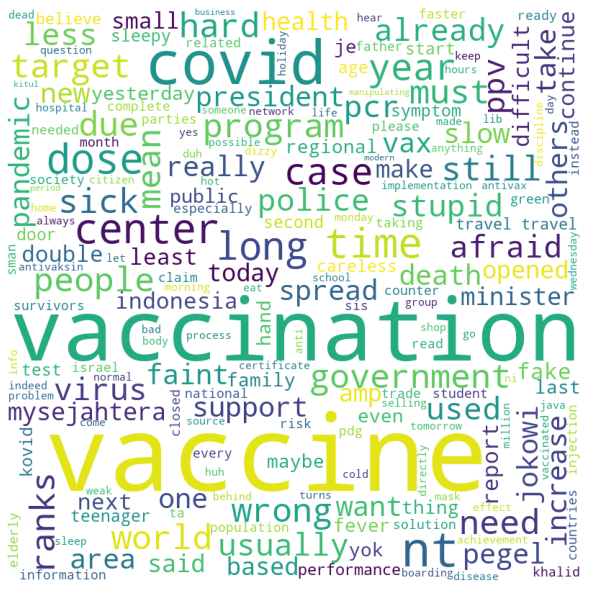

In [56]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wc_negatif.text_stopword_detokenize:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [57]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[('vaccine', 1.0),
 ('vaccination', 0.8181818181818182),
 ('covid', 0.3333333333333333),
 ('nt', 0.19696969696969696),
 ('center', 0.13636363636363635),
 ('time', 0.13636363636363635),
 ('dose', 0.13636363636363635),
 ('long', 0.12121212121212122),
 ('year', 0.10606060606060606),
 ('case', 0.10606060606060606),
 ('need', 0.09090909090909091),
 ('still', 0.09090909090909091),
 ('world', 0.09090909090909091),
 ('government', 0.09090909090909091),
 ('program', 0.09090909090909091),
 ('people', 0.09090909090909091),
 ('must', 0.09090909090909091),
 ('ranks', 0.09090909090909091),
 ('target', 0.09090909090909091),
 ('hard', 0.09090909090909091),
 ('wrong', 0.09090909090909091),
 ('due', 0.09090909090909091),
 ('sick', 0.09090909090909091),
 ('mean', 0.09090909090909091),
 ('ppv', 0.07575757575757576),
 ('virus', 0.07575757575757576),
 ('used', 0.07575757575757576),
 ('less', 0.07575757575757576),
 ('police', 0.07575757575757576),
 ('afraid', 0.07575757575757576),
 ('usually', 0.075757575757

In [58]:
wc_positif= dfclean[dfclean['label'] == 'positif']
wc_positif

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label,text_stopword_detokenize
3,GSaraw4,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaksinasi untuk Menyelamatkan diri sendiri dan...,Vaccination to save yourself and the vaccine f...,vaccination to save yourself and the vaccine f...,"['vaccination', 'to', 'save', 'yourself', 'and...","[('vaccination', 'NN'), ('to', 'TO'), ('save',...","['vaccination', 'save', 'vaccine', 'family', '...","['vaccin', 'save', 'vaccin', 'famili', 'prove'...",0.500000,positif,vaccination save vaccine family proved safe
6,GSaraw4,Antusiasme Masyarakat Ikut Vaksinasi Covid-19 ...,Antusiasme Masyarakat Ikut Vaksinasi Covid Mas...,The enthusiasm of the community participates i...,the enthusiasm of the community participates i...,"['the', 'enthusiasm', 'of', 'the', 'community'...","[('the', 'DT'), ('enthusiasm', 'NN'), ('of', '...","['enthusiasm', 'community', 'participates', 'v...","['enthusiasm', 'commun', 'particip', 'vaccin',...",0.330000,positif,enthusiasm community participates vaccination ...
8,GSaraw4,Vaksinasi demi terciptanya herd immunity\nVaks...,Vaksinasi demi terciptanya herd immunity Vaksi...,Vaccination for the creation of Herd Immunity ...,vaccination for the creation of herd immunity ...,"['vaccination', 'for', 'the', 'creation', 'of'...","[('vaccination', 'NN'), ('for', 'IN'), ('the',...","['vaccination', 'creation', 'herd', 'immunity'...","['vaccin', 'creation', 'herd', 'immun', 'vacci...",0.500000,positif,vaccination creation herd immunity vaccines pr...
11,heni_dalimunthe,RT @humas_limo: AYO SEGERA VAKSIN\n\nDalam ran...,AYO SEGERA VAKSIN Dalam rangka menekan angka ...,Let's immediately vaccine in order to reduce ...,let's immediately vaccine in order to reduce ...,"['let', ""'s"", 'immediately', 'vaccine', 'in', ...","[('let', 'NN'), (""'s"", 'POS'), ('immediately',...","['let', ""'s"", 'immediately', 'vaccine', 'order...","['let', ""'s"", 'immedi', 'vaccin', 'order', 're...",0.500000,positif,"let ""s"" immediately vaccine order reduce numbe..."
21,KhanzaPtrri,Ini baik dalam pendisiplinan penerapan protoko...,Ini baik dalam pendisiplinan penerapan protoko...,This is good at disciplining the application o...,this is good at disciplining the application o...,"['this', 'is', 'good', 'at', 'disciplining', '...","[('this', 'DT'), ('is', 'VBZ'), ('good', 'JJ')...","['good', 'disciplining', 'application', 'covid...","['good', 'disciplin', 'applic', 'covid', 'pati...",0.700000,positif,good disciplining application covid patient ca...
...,...,...,...,...,...,...,...,...,...,...,...,...
1398,Walid60185809,RT @harakahdailyHD: TERKINI | 06 OKTOBER 2021\...,TERKINI OKTOBER Malaysia antara negara terpan...,The latest October Malaysia is among the fast...,the latest october malaysia is among the fast...,"['the', 'latest', 'october', 'malaysia', 'is',...","[('the', 'DT'), ('latest', 'JJS'), ('october',...","['latest', 'october', 'malaysia', 'among', 'fa...","['latest', 'octob', 'malaysia', 'among', 'fast...",0.500000,positif,latest october malaysia among fastest countrie...
1406,RadioElshinta,Sebanyak 2 juta percakapan Hoaks menyebar di S...,Sebanyak juta percakapan Hoaks menyebar di Sos...,A total of millions of shaking conversations s...,a total of millions of shaking conversations s...,"['a', 'total', 'of', 'millions', 'of', 'shakin...","[('a', 'DT'), ('total', 'NN'), ('of', 'IN'), (...","['total', 'millions', 'shaking', 'conversation...","['total', 'million', 'shake', 'convers', 'spre...",0.016667,positif,total millions shaking conversations spread so...
1408,asasfuro,RT @RTM_Malaysia: PENJARAKAN FIZIKAL 1 METER\n...,PENJARAKAN FIZIKAL METER Untuk hidup dengan v...,Physical torment of meters to live with virus...,physical torment of meters to live with virus...,"['physical', 'torment', 'of', 'meters', 'to', ...","[('physical', 'JJ'), ('torment', 'NN'), ('of',...","['physical', 'torment', 'meters', 'live', 'vir...","['physic', 'torm

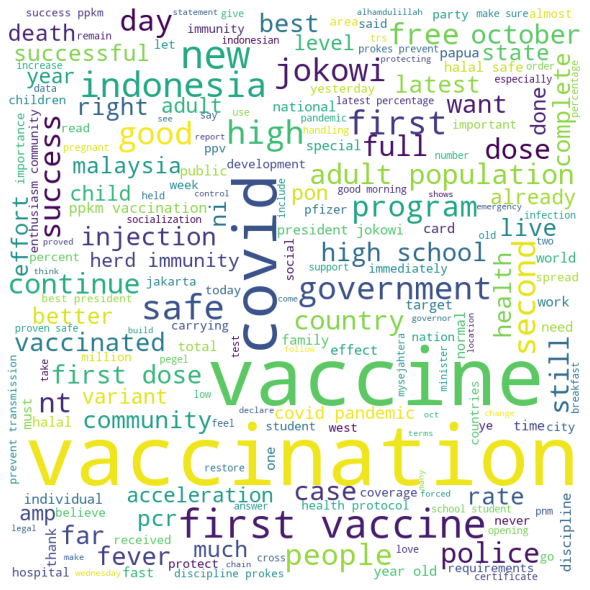

In [60]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wc_positif.text_stopword_detokenize:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [61]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[('vaccination', 1.0),
 ('vaccine', 0.9074074074074074),
 ('covid', 0.4567901234567901),
 ('first vaccine', 0.14814814814814814),
 ('new', 0.1419753086419753),
 ('safe', 0.11728395061728394),
 ('indonesia', 0.11728395061728394),
 ('first', 0.10493827160493827),
 ('high', 0.09876543209876543),
 ('government', 0.09876543209876543),
 ('second', 0.09876543209876543),
 ('good', 0.09259259259259259),
 ('jokowi', 0.09259259259259259),
 ('free', 0.08024691358024691),
 ('people', 0.08024691358024691),
 ('day', 0.08024691358024691),
 ('success', 0.08024691358024691),
 ('program', 0.08024691358024691),
 ('dose', 0.07407407407407407),
 ('nt', 0.07407407407407407),
 ('continue', 0.07407407407407407),
 ('police', 0.07407407407407407),
 ('full', 0.07407407407407407),
 ('adult population', 0.07407407407407407),
 ('still', 0.06790123456790123),
 ('case', 0.06790123456790123),
 ('october', 0.06790123456790123),
 ('country', 0.06790123456790123),
 ('far', 0.06172839506172839),
 ('vaccinated', 0.061728395

In [62]:
wc_netral = dfclean[dfclean['label'] == 'netral']
wc_netral

,username,tweet,clean_tweet,en_tweet,text,text_tokenized,text_tagging,text_stopword,text_stemmed,polarity,label,text_stopword_detokenize
0,pqrzan,RT @KKMPutrajaya: Selepas rentas negeri dibena...,Selepas rentas negeri dibenarkan tiada sekata...,After cross-state allowed no roadblocks to ch...,after cross-state allowed no roadblocks to ch...,"['after', 'cross-state', 'allowed', 'no', 'roa...","[('after', 'IN'), ('cross-state', 'NN'), ('all...","['cross-state', 'allowed', 'roadblocks', 'chec...","['cross-stat', 'allow', 'roadblock', 'check', ...",0.0,netral,cross-state allowed roadblocks check person ei...
1,mcreativepky,Jaga Vaksinasi Covid-19 di Puskesmas Tangkilin...,Jaga Vaksinasi Covid di Puskesmas Tangkiling K...,Keep Covid Vaccination at Tangkeliling Puskesk...,keep covid vaccination at tangkeliling puskesk...,"['keep', 'covid', 'vaccination', 'at', 'tangke...","[('keep', 'VB'), ('covid', 'NN'), ('vaccinatio...","['keep', 'covid', 'vaccination', 'tangkeliling...","['keep', 'covid', 'vaccin', 'tangkelil', 'pusk...",0.0,netral,keep covid vaccination tangkeliling puskesk bu...
2,veemarisa,RT @KKMPutrajaya: mengawal pergerakan mereka y...,mengawal pergerakan mereka yang enggan meneri...,Control the movement of those who refuse to r...,control the movement of those who refuse to r...,"['control', 'the', 'movement', 'of', 'those', ...","[('control', 'VB'), ('the', 'DT'), ('movement'...","['control', 'movement', 'refuse', 'receive', '...","['control', 'movement', 'refus', 'receiv', 'va...",0.0,netral,control movement refuse receive vaccination in...
4,Papalov03973158,Vaksinasi penting dilakukan untuk meningkatkan...,Vaksinasi penting dilakukan untuk meningkatkan...,Important vaccination is done to increase the ...,important vaccination is done to increase the ...,"['important', 'vaccination', 'is', 'done', 'to...","[('important', 'JJ'), ('vaccination', 'NN'), (...","['important', 'vaccination', 'done', 'increase...","['import', 'vaccin', 'done', 'increas', 'bodi'...",0.0,netral,"important vaccination done increase body ""s"" i..."
5,nazlieyta,RT @redzuanNewsMPB: Individu yang tidak ambil ...,Individu yang tidak ambil vaksin masih boleh ...,Individuals who do not take vaccines can stil...,individuals who do not take vaccines can stil...,"['individuals', 'who', 'do', 'not', 'take', 'v...","[('individuals', 'NNS'), ('who', 'WP'), ('do',...","['individuals', 'take', 'vaccines', 'still', '...","['individu', 'take', 'vaccin', 'still', 'cross...",0.0,netral,individuals take vaccines still cross-country ...
...,...,...,...,...,...,...,...,...,...,...,...,...
1405,Sek_Cly,Sinergi Vaksinasi \nPelayanan Vaksinasi Presis...,Sinergi Vaksinasi Pelayanan Vaksinasi Presisi ...,Synergy Vaccination of the Precision Vaccinati...,synergy vaccination of the precision vaccinati...,"['synergy', 'vaccination', 'of', 'the', 'preci...","[('synergy', 'JJ'), ('vaccination', 'NN'), ('o...","['synergy', 'vaccination', 'precision', 'vacci...","['synergi', 'vaccin', 'precis', 'vaccin', 'ser...",0.0,netral,synergy vaccination precision vaccination serv...
1407,haijoon_,Aku setelah jadwal vaksinasi minggu depan kelu...,Aku setelah jadwal vaksinasi minggu depan keluar,I'm after the vaccination schedule next week c...,i'm after the vaccination schedule next week c...,"['i', ""'m"", 'after', 'the', 'vaccination', 'sc...","[('i', 'NN'), (""'m"", 'VBP'), ('after', 'IN'), ...","[""'m"", 'vaccination', 'schedule', 'next', 'wee...","[""'m"", 'vaccin', 'schedul', 'next', 'week', 'c...",0.0,netral,"""m"" vaccination schedule next week comes"
1409,KontanNews,"Vaksinasi Covid-19 per 23 Oktober bertambah 1,...",Vaksinasi Covid per Oktober bertambah juta dosis,Covid vaccination as of October increases mill...,covid vaccination as of october increases mill...,"['covid', 'vaccination', 'as', 'of', 'october'...","[('covid', 'JJ'), ('vaccination', 'NN'), ('as'...","['covid', 'vaccination', 'october', 'increases...","['covid', 'vaccin', 'octob', 'increas', 'milli...",0.0,netral,co

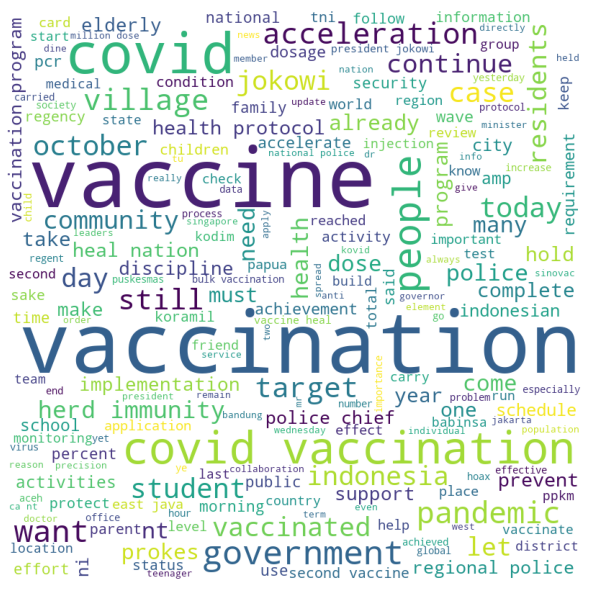

In [63]:
comment_words = ''
stopwords = set(STOPWORDS)
 
# iterate through the csv file
for val in wc_netral.text_stopword_detokenize:
     
    # typecaste each val to string
    val = str(val)
 
    # split the value
    tokens = val.split()
     
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
     
    comment_words += " ".join(tokens)+" "
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [64]:
rel_freq=wordcloud.words_
#rel_freq

list(rel_freq.items())[:]

[('vaccination', 1.0),
 ('vaccine', 0.9571788413098237),
 ('covid', 0.3425692695214106),
 ('covid vaccination', 0.20151133501259447),
 ('people', 0.14357682619647355),
 ('government', 0.11083123425692695),
 ('want', 0.0906801007556675),
 ('pandemic', 0.08564231738035265),
 ('acceleration', 0.08312342569269521),
 ('village', 0.08312342569269521),
 ('still', 0.08060453400503778),
 ('target', 0.08060453400503778),
 ('october', 0.07808564231738035),
 ('today', 0.07808564231738035),
 ('case', 0.07808564231738035),
 ('student', 0.07556675062972293),
 ('indonesia', 0.07304785894206549),
 ('day', 0.07304785894206549),
 ('vaccinated', 0.07304785894206549),
 ('jokowi', 0.07304785894206549),
 ('residents', 0.07052896725440806),
 ('continue', 0.07052896725440806),
 ('community', 0.06801007556675064),
 ('let', 0.06801007556675064),
 ('herd immunity', 0.060453400503778336),
 ('police', 0.05793450881612091),
 ('health', 0.05793450881612091),
 ('nt', 0.05793450881612091),
 ('need', 0.05541561712846347